<a href="https://colab.research.google.com/github/gcerda15/Poli-179-Project-/blob/main/ACTUAL%20POLI%20179%20FINAL%20PROJECT%20CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install transformers
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random
import torch
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [4]:
from google.colab import files
uploaded = files.upload()

Saving merged_final (1).csv to merged_final (1).csv


In [7]:
df = pd.read_csv('merged_final (1).csv')
df

,ID,FAMILY_INCOME,RSAT_TOTAL_SCORE,RSAT_EBRW,RSAT_MATH_SCORE,Winning_Competitions,Math,AP_Classes,Work_And_Goals,Camping_Swimming,...,Period,Comma,Colon,SemiC,QMark,Exclam,Quote,Apostro,Parenth,OtherP
0,1,180000,1350,650,700,0.002242,0.000934,0.009605,0.011167,0.002307,...,5.50,2.75,0.00,0.16,0.00,0.00,0.16,1.78,0.16,0.00
1,2,175000,1200,570,630,0.004480,0.000736,0.008061,0.011967,0.067532,...,5.82,4.06,0.09,0.09,0.00,0.00,0.18,0.71,0.00,0.09
2,3,32000,990,470,520,0.000353,0.007873,0.021253,0.028026,0.000248,...,4.61,2.42,0.00,0.15,0.00,0.00,0.15,0.38,0.00,0.08
3,4,56000,1150,570,580,0.001888,0.038390,0.003707,0.018204,0.001599,...,5.46,3.90,0.00,0.00,0.00,0.00,0.39,1.17,0.00,0.00
4,5,600000,1370,670,700,0.032499,0.002569,0.012160,0.019745,0.018485,...,5.89,4.96,0.00,0.15,0.00,0.15,0.15,1.94,0.31,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59718,59996,160000,1250,570,680,0.003455,0.030667,0.011292,0.019135,0.001092,...,4.64,3.09,0.07,0.07,0.00,0.00,0.15,0.52,0.00,0.00
59719,59997,18650,1160,610,550,0.000920,0.003820,0.030767,0.007732,0.000868,...,5.85,3.04,0.00,0.00,0.00,0.00,0.15,0.96,0.00,0.00
59720,59998,100000,1260,630,630,0.001254,0.002031,0.006140,0.005953,0.000862,...,3.17,2.72,0.00,0.00,0.00,0.00,0.23,1.25,0.00,0.00
59721,59999,200000,1350,690,660,0.025663,0.000602,0.002429,0.007649,0.003282,...,8.47,4.60,0.00,0.00,0.00,0.00,0.15,1.46,0.00,0.00


In [8]:
topic_names = [
    'Winning_Competitions', 'Math', 'AP_Classes', 'Work_And_Goals', 'Camping_Swimming',
    'Social_Anxiety', 'Gendered_Activities', 'Fashion_Style', 'Family_Members',
    'Medical_Experiences', 'Helping_Others', 'Despite_Words', 'Latinx_Family_Issues',
    'Education_Opportunity', 'Classroom_Experiences', 'Youth_Volunteering',
    'Reading_Writing', 'Making_Planning', 'Visual_Art', 'Travel', 'Leadership_Skills',
    'Seeking_Answers', 'Mental_Health', 'Outside_School_Programs', 'Volunteer_Cleaning',
    'Work_Experiences', 'Family_Death', 'Motivations_Goals', 'Psychology_Understanding',
    'Group_Leadership', 'Sports_Experiences', 'World_Histories', 'China',
    'Language_Experiences', 'Cooking', 'Civic_Experiences', 'Time_Management',
    'Sensory_Experiences', 'Sociocultural_Diversity', 'Business_Economics',
    'Performance_Art', 'Computer_Science', 'Photography', 'School_Activities',
    'Humor_Storytelling', 'Group_Assignments', 'Work_Money', 'Process_Words',
    'Boy_Scouts', 'Video_Film', 'Family_Church', 'Building_Engines', 'Human_Nature',
    'Music', 'Life_Reflections', 'Time_Cycles', 'Life_Challenges', 'Sensory_Responses',
    'HS_Years', 'Sports_General', 'School_Grades', 'Dancing_Art', 'Community_Service',
    'Preference_Words', 'Achievement_Words', 'Puzzles_Problems', 'Chemistry_Biology',
    'Tutoring_Groups', 'Physics', 'New_Exepriences'
    ]

In [9]:
def bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()


#its doing bert ITS ALIIIVVEEEEEEE

In [10]:
topic_embeddings = {topic: bert_embeddings(topic) for topic in topic_names}
#this is generating embeddings for each of the topic_names

In [11]:
text_columns = df.columns[5:75]
text_columns

Index(['Winning_Competitions', 'Math', 'AP_Classes', 'Work_And_Goals',
       'Camping_Swimming', 'Social_Anxiety', 'Gendered_Activities',
       'Fashion_Style', 'Family_Members', 'Medical_Experiences',
       'Helping_Others', 'Despite_Words', 'Latinx_Family_Issues',
       'Education_Opportunity', 'Classroom_Experiences', 'Youth_Volunteering',
       'Reading_Writing', 'Making_Planning', 'Visual_Art', 'Travel',
       'Leadership_Skills', 'Seeking_Answers', 'Mental_Health',
       'Outside_School_Programs', 'Volunteer_Cleaning', 'Work_Experiences',
       'Family_Death', 'Motivations_Goals', 'Psychology_Understanding',
       'Group_Leadership', 'Sports_Experiences', 'World_Histories', 'China',
       'Language_Experiences', 'Cooking', 'Civic_Experiences',
       'Time_Management', 'Sensory_Experiences', 'Sociocultural_Diversity',
       'Business_Economics', 'Performance_Art', 'Computer_Science',
       'Photography', 'School_Activities', 'Humor_Storytelling',
       'Group_Assignm

In [12]:
#now,print, PRINT IT NOWW <- that was agressive, i just want to see the dimensions man
topic_embeddings.keys()

dict_keys(['Winning_Competitions', 'Math', 'AP_Classes', 'Work_And_Goals', 'Camping_Swimming', 'Social_Anxiety', 'Gendered_Activities', 'Fashion_Style', 'Family_Members', 'Medical_Experiences', 'Helping_Others', 'Despite_Words', 'Latinx_Family_Issues', 'Education_Opportunity', 'Classroom_Experiences', 'Youth_Volunteering', 'Reading_Writing', 'Making_Planning', 'Visual_Art', 'Travel', 'Leadership_Skills', 'Seeking_Answers', 'Mental_Health', 'Outside_School_Programs', 'Volunteer_Cleaning', 'Work_Experiences', 'Family_Death', 'Motivations_Goals', 'Psychology_Understanding', 'Group_Leadership', 'Sports_Experiences', 'World_Histories', 'China', 'Language_Experiences', 'Cooking', 'Civic_Experiences', 'Time_Management', 'Sensory_Experiences', 'Sociocultural_Diversity', 'Business_Economics', 'Performance_Art', 'Computer_Science', 'Photography', 'School_Activities', 'Humor_Storytelling', 'Group_Assignments', 'Work_Money', 'Process_Words', 'Boy_Scouts', 'Video_Film', 'Family_Church', 'Building_E

In [13]:
num_applicants = df.shape[0] #row...
embedding_dim = 768 #bert claims to only do 768 dimmensions
sum_embeddings = np.zeros((num_applicants, embedding_dim))

In [14]:
topic_embeddings["Physics"]

array([ 1.51953459e-01,  1.03923656e-01, -5.20991683e-01,  1.00657977e-01,
       -2.14488864e-01,  1.42890615e-02,  1.82634041e-01,  3.89537424e-01,
       -4.17692542e-01, -1.64227441e-01, -7.03671649e-02, -6.63976148e-02,
        1.25262722e-01,  8.38871598e-02, -4.18358326e-01, -1.57962933e-01,
        1.24553062e-01,  6.67062327e-02,  1.29360974e-01,  2.81188995e-01,
        1.38023242e-01,  4.55774404e-02, -2.72718277e-02, -1.30940452e-01,
       -1.05588019e-01,  1.19283058e-01, -3.50203127e-01,  2.28791639e-01,
       -1.87075064e-01,  3.32271867e-02, -2.34917760e-01,  2.98967987e-01,
       -4.11589384e-01,  4.86249179e-01,  3.88851523e-01, -2.44625404e-01,
        1.42935798e-01, -1.40542686e-01, -2.99104095e-01,  6.58750758e-02,
       -2.73255557e-01,  2.11926356e-01,  2.96118259e-01, -1.75542831e-01,
        1.99249879e-01, -3.62730652e-01, -1.56057820e-01, -1.87262222e-01,
       -5.08394361e-01,  4.01675671e-01, -6.29179999e-02,  2.32232332e-01,
        3.30108196e-01,  

In [15]:
topic_names = list(topic_embeddings.keys())
topic_names

['Winning_Competitions',
 'Math',
 'AP_Classes',
 'Work_And_Goals',
 'Camping_Swimming',
 'Social_Anxiety',
 'Gendered_Activities',
 'Fashion_Style',
 'Family_Members',
 'Medical_Experiences',
 'Helping_Others',
 'Despite_Words',
 'Latinx_Family_Issues',
 'Education_Opportunity',
 'Classroom_Experiences',
 'Youth_Volunteering',
 'Reading_Writing',
 'Making_Planning',
 'Visual_Art',
 'Travel',
 'Leadership_Skills',
 'Seeking_Answers',
 'Mental_Health',
 'Outside_School_Programs',
 'Volunteer_Cleaning',
 'Work_Experiences',
 'Family_Death',
 'Motivations_Goals',
 'Psychology_Understanding',
 'Group_Leadership',
 'Sports_Experiences',
 'World_Histories',
 'China',
 'Language_Experiences',
 'Cooking',
 'Civic_Experiences',
 'Time_Management',
 'Sensory_Experiences',
 'Sociocultural_Diversity',
 'Business_Economics',
 'Performance_Art',
 'Computer_Science',
 'Photography',
 'School_Activities',
 'Humor_Storytelling',
 'Group_Assignments',
 'Work_Money',
 'Process_Words',
 'Boy_Scouts',
 'Vi

In [16]:
sum_embeddings[1, :].shape

(768,)

In [17]:
for val in topic_names:
        print("Summing embeddings for topic:", topic_names)
        for i in range(df.shape[0]):
            embedding = topic_embeddings[val]
            sum_embeddings[i, :] += embedding

Summing embeddings for topic: ['Winning_Competitions', 'Math', 'AP_Classes', 'Work_And_Goals', 'Camping_Swimming', 'Social_Anxiety', 'Gendered_Activities', 'Fashion_Style', 'Family_Members', 'Medical_Experiences', 'Helping_Others', 'Despite_Words', 'Latinx_Family_Issues', 'Education_Opportunity', 'Classroom_Experiences', 'Youth_Volunteering', 'Reading_Writing', 'Making_Planning', 'Visual_Art', 'Travel', 'Leadership_Skills', 'Seeking_Answers', 'Mental_Health', 'Outside_School_Programs', 'Volunteer_Cleaning', 'Work_Experiences', 'Family_Death', 'Motivations_Goals', 'Psychology_Understanding', 'Group_Leadership', 'Sports_Experiences', 'World_Histories', 'China', 'Language_Experiences', 'Cooking', 'Civic_Experiences', 'Time_Management', 'Sensory_Experiences', 'Sociocultural_Diversity', 'Business_Economics', 'Performance_Art', 'Computer_Science', 'Photography', 'School_Activities', 'Humor_Storytelling', 'Group_Assignments', 'Work_Money', 'Process_Words', 'Boy_Scouts', 'Video_Film', 'Family_

In [18]:
# we need the embeddings for each row then adding weight value
for index, row in df.iterrows():
    row_embedding = np.zeros(embedding_dim)
    for topic in topic_names:
        topic_weight = row[topic]
        topic_embedding = topic_embeddings[topic]
        row_embedding += topic_weight * topic_embedding
    sum_embeddings[index, :] = row_embedding

In [19]:
sum_embeddings = sum_embeddings / len(text_columns)

In [20]:
sum_embeddings.shape

(59723, 768)

In [21]:
sum_embeddings

array([[ 0.00382655,  0.00257263,  0.00099249, ..., -0.00287222,
        -0.00298124, -0.00257038],
       [ 0.00421536,  0.00229775,  0.00133137, ..., -0.00294173,
        -0.00354386, -0.0029985 ],
       [ 0.00389894,  0.00271303,  0.00198721, ..., -0.00256373,
        -0.00350246, -0.00317761],
       ...,
       [ 0.00382678,  0.00288756,  0.00043563, ..., -0.00306614,
        -0.0024273 , -0.00222492],
       [ 0.00402011,  0.0025434 ,  0.00040757, ..., -0.00337041,
        -0.00245725, -0.00293494],
       [ 0.00374259,  0.00205392,  0.00173288, ..., -0.00334806,
        -0.00366245, -0.00270264]])

In [22]:
sum_embeddings_df = pd.DataFrame(sum_embeddings, columns=[f'Summed_BERT_{i}' for i in range(embedding_dim)])


In [23]:
df = pd.concat([df, sum_embeddings_df], axis=1)

In [24]:
print(df.head())

   ID  FAMILY_INCOME  RSAT_TOTAL_SCORE  RSAT_EBRW  RSAT_MATH_SCORE  \
0   1         180000              1350        650              700   
1   2         175000              1200        570              630   
2   3          32000               990        470              520   
3   4          56000              1150        570              580   
4   5         600000              1370        670              700   

   Winning_Competitions      Math  AP_Classes  Work_And_Goals  \
0              0.002242  0.000934    0.009605        0.011167   
1              0.004480  0.000736    0.008061        0.011967   
2              0.000353  0.007873    0.021253        0.028026   
3              0.001888  0.038390    0.003707        0.018204   
4              0.032499  0.002569    0.012160        0.019745   

   Camping_Swimming  ...  Summed_BERT_758  Summed_BERT_759  Summed_BERT_760  \
0          0.002307  ...         0.007015         0.000088         0.000430   
1          0.067532  ...      

In [25]:
print(df.tail())

          ID  FAMILY_INCOME  RSAT_TOTAL_SCORE  RSAT_EBRW  RSAT_MATH_SCORE  \
59718  59996         160000              1250        570              680   
59719  59997          18650              1160        610              550   
59720  59998         100000              1260        630              630   
59721  59999         200000              1350        690              660   
59722  60000          18887              1000        510              490   

       Winning_Competitions      Math  AP_Classes  Work_And_Goals  \
59718              0.003455  0.030667    0.011292        0.019135   
59719              0.000920  0.003820    0.030767        0.007732   
59720              0.001254  0.002031    0.006140        0.005953   
59721              0.025663  0.000602    0.002429        0.007649   
59722              0.000873  0.034443    0.012786        0.017886   

       Camping_Swimming  ...  Summed_BERT_758  Summed_BERT_759  \
59718          0.001092  ...         0.007796         0.

In [26]:
for topic, embedding in list(topic_embeddings.items())[:5]:
    print(f"Topic: {topic}, Embedding: {embedding[:5]}...")

Topic: Winning_Competitions, Embedding: [0.24408782 0.1339162  0.34512657 0.02235677 0.16058502]...
Topic: Math, Embedding: [-0.10369333 -0.3075895  -0.17745884 -0.04453592  0.07462937]...
Topic: AP_Classes, Embedding: [0.2629208  0.30373704 0.09910195 0.31771636 0.06664287]...
Topic: Work_And_Goals, Embedding: [0.17782028 0.17360899 0.06397195 0.03313991 0.19696407]...
Topic: Camping_Swimming, Embedding: [ 0.6140918   0.0722119  -0.08436912  0.31477442  0.25006   ]...


In [27]:
print("Sample values from text columns:")
for column in text_columns[:5]:  # Check the first 5 columns
    print(f"Column: {column}, Sample values: {df[column].head().tolist()}")

Sample values from text columns:
Column: Winning_Competitions, Sample values: [0.002241978, 0.00447959, 0.000353453, 0.001887506, 0.032499439]
Column: Math, Sample values: [0.00093436, 0.000735876, 0.007872841, 0.038389826, 0.002568511]
Column: AP_Classes, Sample values: [0.009604576, 0.008060678, 0.021253289, 0.003706876, 0.012160472]
Column: Work_And_Goals, Sample values: [0.011166705, 0.011966705, 0.028026367, 0.018204304, 0.019744819]
Column: Camping_Swimming, Sample values: [0.002306968, 0.067531928, 0.000248416, 0.001598742, 0.018485149]


In [28]:
dictionary_features = [
    'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun',
    'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb',
    'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect', 'posemo',
    'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'female', 'male', 'cogproc',
    'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear', 'feel',
    'bio', 'body', 'health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve', 'power', 'reward',
    'risk', 'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time', 'work',
    'leisure', 'home', 'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu',
    'filler', 'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam', 'Quote', 'Apostro',
    'Parenth', 'OtherP'
]

In [29]:
dictionary_embeddings = {feature: bert_embeddings(feature) for feature in dictionary_features}
features_columns = df.columns[75:167]
features_columns

Index(['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic',
       'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they',
       'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate',
       'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect',
       'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend',
       'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat',
       'certain', 'differ', 'percept', 'see', 'hear', 'feel', 'bio', 'body',
       'health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve',
       'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture',
       'relativ', 'motion', 'space', 'time', 'work', 'leisure', 'home',
       'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent',
       'nonflu', 'filler', 'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC',
       'QMark', 'Exclam', 'Quote', 'Apostro', 'Parenth', 'OtherP'],
      dtype='object')

In [30]:
dictionary_embeddings.keys()

dict_keys(['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time', 'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam', 'Quote', 'Apostro', 'Parenth', 'OtherP'])

In [31]:
sum_embeddings_dict = np.zeros((num_applicants, embedding_dim))

In [32]:
dictionary_names = list(dictionary_embeddings.keys())
dictionary_names

['WC',
 'Analytic',
 'Clout',
 'Authentic',
 'Tone',
 'WPS',
 'Sixltr',
 'Dic',
 'function',
 'pronoun',
 'ppron',
 'i',
 'we',
 'you',
 'shehe',
 'they',
 'ipron',
 'article',
 'prep',
 'auxverb',
 'adverb',
 'conj',
 'negate',
 'verb',
 'adj',
 'compare',
 'interrog',
 'number',
 'quant',
 'affect',
 'posemo',
 'negemo',
 'anx',
 'anger',
 'sad',
 'social',
 'family',
 'friend',
 'female',
 'male',
 'cogproc',
 'insight',
 'cause',
 'discrep',
 'tentat',
 'certain',
 'differ',
 'percept',
 'see',
 'hear',
 'feel',
 'bio',
 'body',
 'health',
 'sexual',
 'ingest',
 'drives',
 'affiliation',
 'achieve',
 'power',
 'reward',
 'risk',
 'focuspast',
 'focuspresent',
 'focusfuture',
 'relativ',
 'motion',
 'space',
 'time',
 'work',
 'leisure',
 'home',
 'money',
 'relig',
 'death',
 'informal',
 'swear',
 'netspeak',
 'assent',
 'nonflu',
 'filler',
 'AllPunc',
 'Period',
 'Comma',
 'Colon',
 'SemiC',
 'QMark',
 'Exclam',
 'Quote',
 'Apostro',
 'Parenth',
 'OtherP']

In [33]:
for val in dictionary_names:
        print("Summing embeddings for Dictionary Features:", dictionary_names)
        for i in range(df.shape[0]):
            embedding = dictionary_embeddings[val]
            sum_embeddings[i, :] += embedding

Summing embeddings for Dictionary Features: ['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time', 'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam', 'Quote', 'Apostro', 'Parenth', 'OtherP']
Summing embeddings for Dictionary Features: ['WC', 'Analytic', 'Clout

In [34]:
for index, row in df.iterrows():
    row_embedding = np.zeros(embedding_dim)
    for feature in dictionary_features:
        feature_weight = row[feature]
        feature_embedding = dictionary_embeddings[feature]
        row_embedding += feature_weight * feature_embedding
    sum_embeddings_dict[index, :] = row_embedding

In [35]:
sum_embeddings_dict = sum_embeddings_dict / len(dictionary_features)

In [36]:
sum_embeddings_dict_df = pd.DataFrame(sum_embeddings_dict, columns=[f'Summed_BERT_Dict_{i}' for i in range(embedding_dim)])

In [37]:
df = pd.concat([df, sum_embeddings_dict_df,sum_embeddings_df], axis=1)

In [38]:
print(df)

          ID  FAMILY_INCOME  RSAT_TOTAL_SCORE  RSAT_EBRW  RSAT_MATH_SCORE  \
0          1         180000              1350        650              700   
1          2         175000              1200        570              630   
2          3          32000               990        470              520   
3          4          56000              1150        570              580   
4          5         600000              1370        670              700   
...      ...            ...               ...        ...              ...   
59718  59996         160000              1250        570              680   
59719  59997          18650              1160        610              550   
59720  59998         100000              1260        630              630   
59721  59999         200000              1350        690              660   
59722  60000          18887              1000        510              490   

       Winning_Competitions      Math  AP_Classes  Work_And_Goals  \
0     

In [39]:
!pip install transformers
!pip install scikit-learn

from transformers import BertTokenizer, BertModel
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


In [40]:
# index for bert embeddings
#summed bert_0 get index


In [41]:
dictionary_columns = df.columns[76:167].tolist()
embedding_columns_dict = [col for col in df.columns if col.startswith('Summed_BERT_Dict')]


X_dict = df[dictionary_columns + embedding_columns_dict]
y = df['FAMILY_INCOME']

scaler = StandardScaler()
X_scaled_dict = scaler.fit_transform(X_dict)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = LinearRegression()

cv_scores_dict = cross_val_score(model, X_scaled_dict, y, cv=kf, scoring='r2')
cv_mse_scores_dict = cross_val_score(model, X_scaled_dict, y, cv=kf, scoring='neg_mean_squared_error')


print(f'Cross-validated R^2 scores for dictionary features: {cv_scores_dict}')
print(f'Mean R^2 score for dictionary features: {np.mean(cv_scores_dict)}')
print(f'Cross-validated MSE scores for dictionary features: {-cv_mse_scores_dict}')
print(f'Mean MSE score for dictionary features: {-np.mean(cv_mse_scores_dict)}')

model.fit(X_scaled_dict, y)
r2_dict = r2_score(y, model.predict(X_scaled_dict))

n = X_scaled_dict.shape[0]
p = X_scaled_dict.shape[1]
adj_r2_dict = 1 - (1 - r2_dict) * ((n - 1) / (n - p - 1))

print(f'Adjusted R^2 for dictionary features: {adj_r2_dict}')

X_sm_dict = sm.add_constant(X_scaled_dict)
model_sm_dict = sm.OLS(y, X_sm_dict).fit()
model_summary_dict = model_sm_dict.summary()

print(model_summary_dict)

Cross-validated R^2 scores for dictionary features: [0.12995436 0.11629937 0.10751542 0.12210273 0.10983217 0.12386353
 0.13135832 0.12164569 0.10617238 0.11519333]
Mean R^2 score for dictionary features: 0.1183937295008047
Cross-validated MSE scores for dictionary features: [1.57709241e+10 1.62799699e+10 1.61700228e+10 1.66314493e+10
 1.66410975e+10 1.65462717e+10 1.70122051e+10 1.49778148e+10
 1.65737877e+10 1.79762223e+10]
Mean MSE score for dictionary features: 16457976521.175491
Adjusted R^2 for dictionary features: 0.1317341474469298
                            OLS Regression Results                            
Dep. Variable:          FAMILY_INCOME   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     11.55
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:46:31   Log-Likelihood:    

In [42]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm

topic_columns = df.columns[5:75].tolist()
embedding_columns_topic = [col for col in df.columns if col.startswith('Summed_BERT_Topic')]

X_topic = df[topic_columns + embedding_columns_topic]
y = df['FAMILY_INCOME']


scaler = StandardScaler()
X_scaled_topic = scaler.fit_transform(X_topic)


kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = LinearRegression()

cv_scores = cross_val_score(model, X_scaled_topic, y, cv=kf, scoring='r2')
cv_mse_scores = cross_val_score(model, X_scaled_topic, y, cv=kf, scoring='neg_mean_squared_error')


print(f'Cross-validated R^2 scores: {cv_scores}')
print(f'Mean R^2 score: {np.mean(cv_scores)}')
print(f'Cross-validated MSE scores: {-cv_mse_scores}')
print(f'Mean MSE score: {-np.mean(cv_mse_scores)}')


model.fit(X_scaled_topic, y)
r2 = r2_score(y, model.predict(X_scaled_topic))
n = X_scaled_topic.shape[0]
p = X_scaled_topic.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f'Adjusted R^2: {adj_r2}')

X_sm_topic = sm.add_constant(X_scaled_topic)
model_sm_topic = sm.OLS(y, X_sm_topic).fit()
model_summary_topic = model_sm_topic.summary()

print(model_summary_topic)

Cross-validated R^2 scores: [0.1766899  0.17112469 0.16074943 0.17013271 0.16611855 0.17963554
 0.18011235 0.16773724 0.16797437 0.15444074]
Mean R^2 score: 0.1694715509013945
Cross-validated MSE scores: [1.49237699e+10 1.52699509e+10 1.52055297e+10 1.57215386e+10
 1.55888610e+10 1.54929897e+10 1.60573655e+10 1.41918555e+10
 1.54278251e+10 1.71788502e+10]
Mean MSE score: 15505853603.69135
Adjusted R^2: 0.17037369811451575
                            OLS Regression Results                            
Dep. Variable:          FAMILY_INCOME   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     176.2
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:46:47   Log-Likelihood:            -7.8536e+05
No. Observations:               59723   AIC:                         1.571e+06
Df Residuals:        

In [43]:

df['income_decile'] = pd.qcut(df['FAMILY_INCOME'], 10, labels=False) + 1


In [44]:
def calculate_adj_r2_per_decile_topic(df, topic_columns, embedding_columns_topic):
    adj_r2_values = []
    for decile in range(1, 11):
        decile_data = df[df['income_decile'] == decile]
        X_decile = decile_data[topic_columns + embedding_columns_topic]
        X_decile = np.log(X_decile.replace(0, np.nan)).fillna(0).to_numpy()
        y_decile = decile_data['FAMILY_INCOME']

        model = LinearRegression()
        model.fit(X_decile, y_decile)
        y_pred = model.predict(X_decile)

        n = X_decile.shape[0]
        p = X_decile.shape[1]
        r2 = r2_score(y_decile, y_pred)
        adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
        adj_r2_values.append(adj_r2)
    return adj_r2_values


adj_r2_topic_per_decile = calculate_adj_r2_per_decile_topic(df, topic_columns, embedding_columns_topic)
print(adj_r2_topic_per_decile)


[0.01060517591549015, -0.003389977594838278, 0.0003078199780923718, 0.013063274777299627, 0.014590493101393043, 0.004264905859004853, 0.008129615636092713, 0.007024213247304845, 0.0067230264611604085, 0.104685385139898]


In [45]:
def calculate_adj_r2_per_decile_dict(df, dictionary_columns, embedding_columns_dict):
    adj_r2_values = []
    for decile in range(1, 11):
        decile_data = df[df['income_decile'] == decile]
        X_decile = decile_data[dictionary_columns + embedding_columns_dict].to_numpy()
        y_decile = decile_data['FAMILY_INCOME']

        model = LinearRegression()
        model.fit(X_decile, y_decile)
        y_pred = model.predict(X_decile)

        n = X_decile.shape[0]
        p = X_decile.shape[1]
        r2 = r2_score(y_decile, y_pred)
        adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
        adj_r2_values.append(adj_r2)
    return adj_r2_values


adj_r2_dict_per_decile = calculate_adj_r2_per_decile_dict(df, dictionary_columns, embedding_columns_dict)
print(adj_r2_dict_per_decile)


[0.012273900044020958, 0.006226952830500343, -0.007849262141147006, -0.005199745280064505, 0.008578070801953941, 0.008614881998225354, 0.0060220596023560224, 0.004559245622145713, 0.0006286640383696973, 0.05736952507504234]


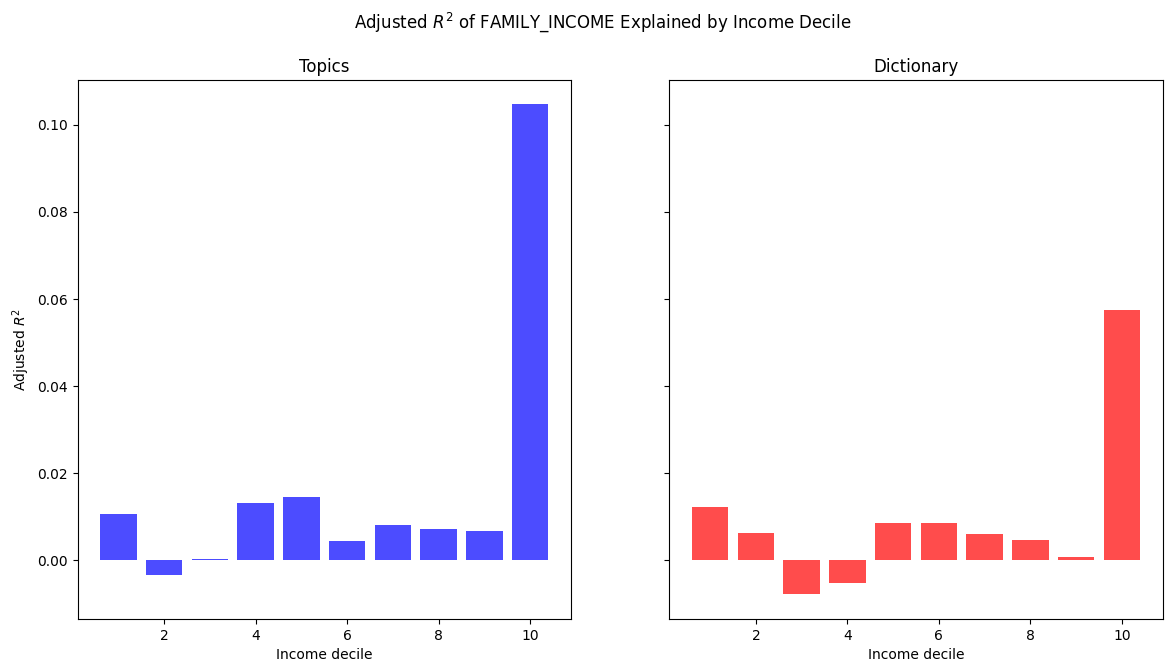

In [46]:

deciles = np.arange(1, 11)

fig, ax = plt.subplots(1, 2, figsize=(14, 7), sharey=True)


ax[0].bar(deciles, adj_r2_topic_per_decile, color='blue', alpha=0.7)
ax[0].set_xlabel('Income decile')
ax[0].set_ylabel('Adjusted $R^2$')
ax[0].set_title('Topics')


ax[1].bar(deciles, adj_r2_dict_per_decile, color='red', alpha=0.7)
ax[1].set_xlabel('Income decile')
ax[1].set_title('Dictionary')

plt.suptitle('Adjusted $R^2$ of FAMILY_INCOME Explained by Income Decile')
plt.savefig('adjusted_r2_income_decile.png')
plt.show()


In [47]:
from google.colab import files

files.download('adjusted_r2_income_decile.png')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>